In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
train_dir=r"C:\Users\Administrator\Desktop\assignments\DL\mnist-jpg\train"
test_dir=r"C:\Users\Administrator\Desktop\assignments\DL\mnist-jpg\test"

In [3]:
batch_size=32
image_size=(28,28)

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True
)

Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [5]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [6]:
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 1352s 721ms/step - loss: 0.6335 - accuracy: 0.8335 - val_loss: 0.3213 - val_accuracy: 0.9077
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3017 - accuracy: 0.9124 - val_loss: 0.2652 - val_accuracy: 0.9203
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2505 - accuracy: 0.9275 - val_loss: 0.2266 - val_accuracy: 0.9331
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2169 - accuracy: 0.9378 - val_loss: 0.1996 - val_accuracy: 0.9398
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1913 - accuracy: 0.9449 - val_loss: 0.1821 - val_accuracy: 0.9452
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1713 - accuracy: 0.9502 - val_loss: 0.1646 - val_accuracy: 0.9493
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1550 - accuracy: 0.9545 - val_loss: 0.151

In [9]:
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.1265 - accuracy: 0.9611
Test accuracy: 0.9610999822616577


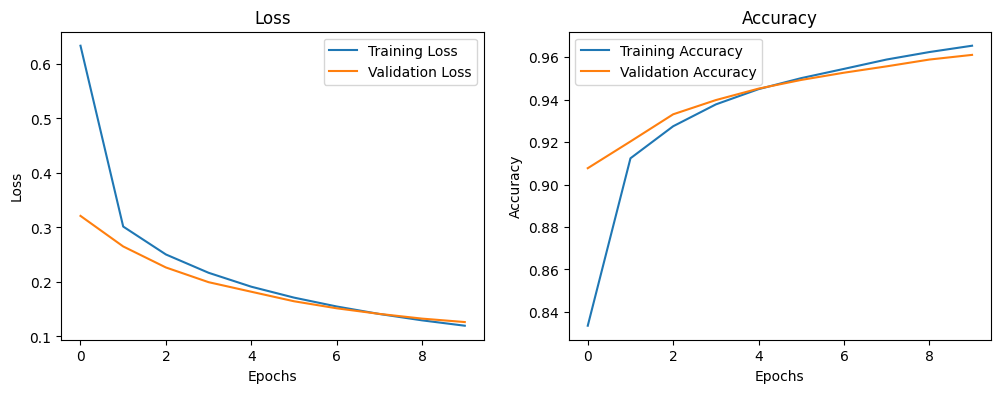

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()